# Notebook Structure

1. Import necessary dependencies
2. Import the required dataset
3. Visualize different columns using Bar plot
4. How to interpret Bar plot



# 1. Import necessary dependencies

In [39]:
# libraries & dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 2. Import the required dataset

In [40]:
# Load the titanic dataset
df = sns.load_dataset('titanic')

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Visualize different columns

### A. Drawing a simple bar plot with default parameters

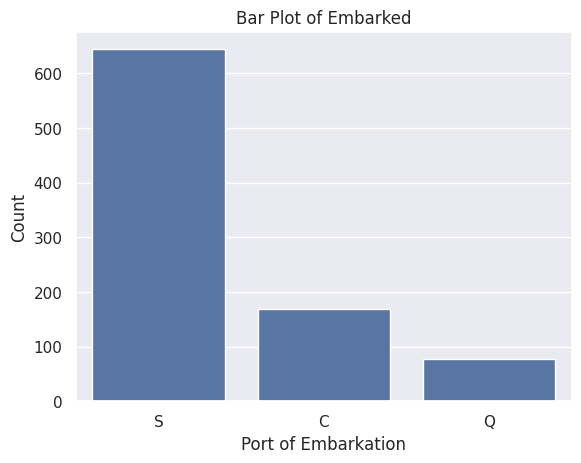

In [42]:
# Create a bar plot for the 'Embarked' column (categorical)
sns.countplot(x='embarked', data=df)

# Add a title and labels
plt.title('Bar Plot of Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

# Show the plot
plt.show()

### B. Improving the graph with different parameters

* Specify the data and the x-variable.
* Set the color of the points.
* Add a title and axis labels.

In [8]:
import warnings
warnings.filterwarnings('ignore')

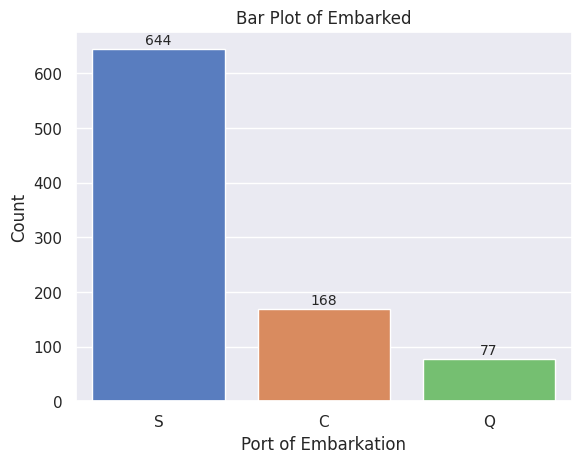

In [43]:
# Create the bar plot
ax = sns.countplot(
    x='embarked',  # Variable to plot on the x-axis
    data=df,  # DataFrame to use
    order=None,  # Order of the categories on the x-axis
    hue_order=None,  # Order of the hue categories
    palette='muted',  # Color palette to use
    saturation=0.75,  # Saturation of the colors
    ax=None  # Axes object to draw the plot onto
)

# Add the count labels on top of the bars
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.text(p.get_x() + p.get_width() / 2., height + 3,  # Position of the text
            f'{int(height)}', ha='center', va='bottom', fontsize=10)  # Format and style of the text

# Add a title and labels
plt.title('Bar Plot of Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

# Show the plot
plt.show()

### C. Visualize multiple bar plots

1. Update the columns that you want to visualize
2. Update the colors of the bar
3. Update the num_cols
4. update the figsize



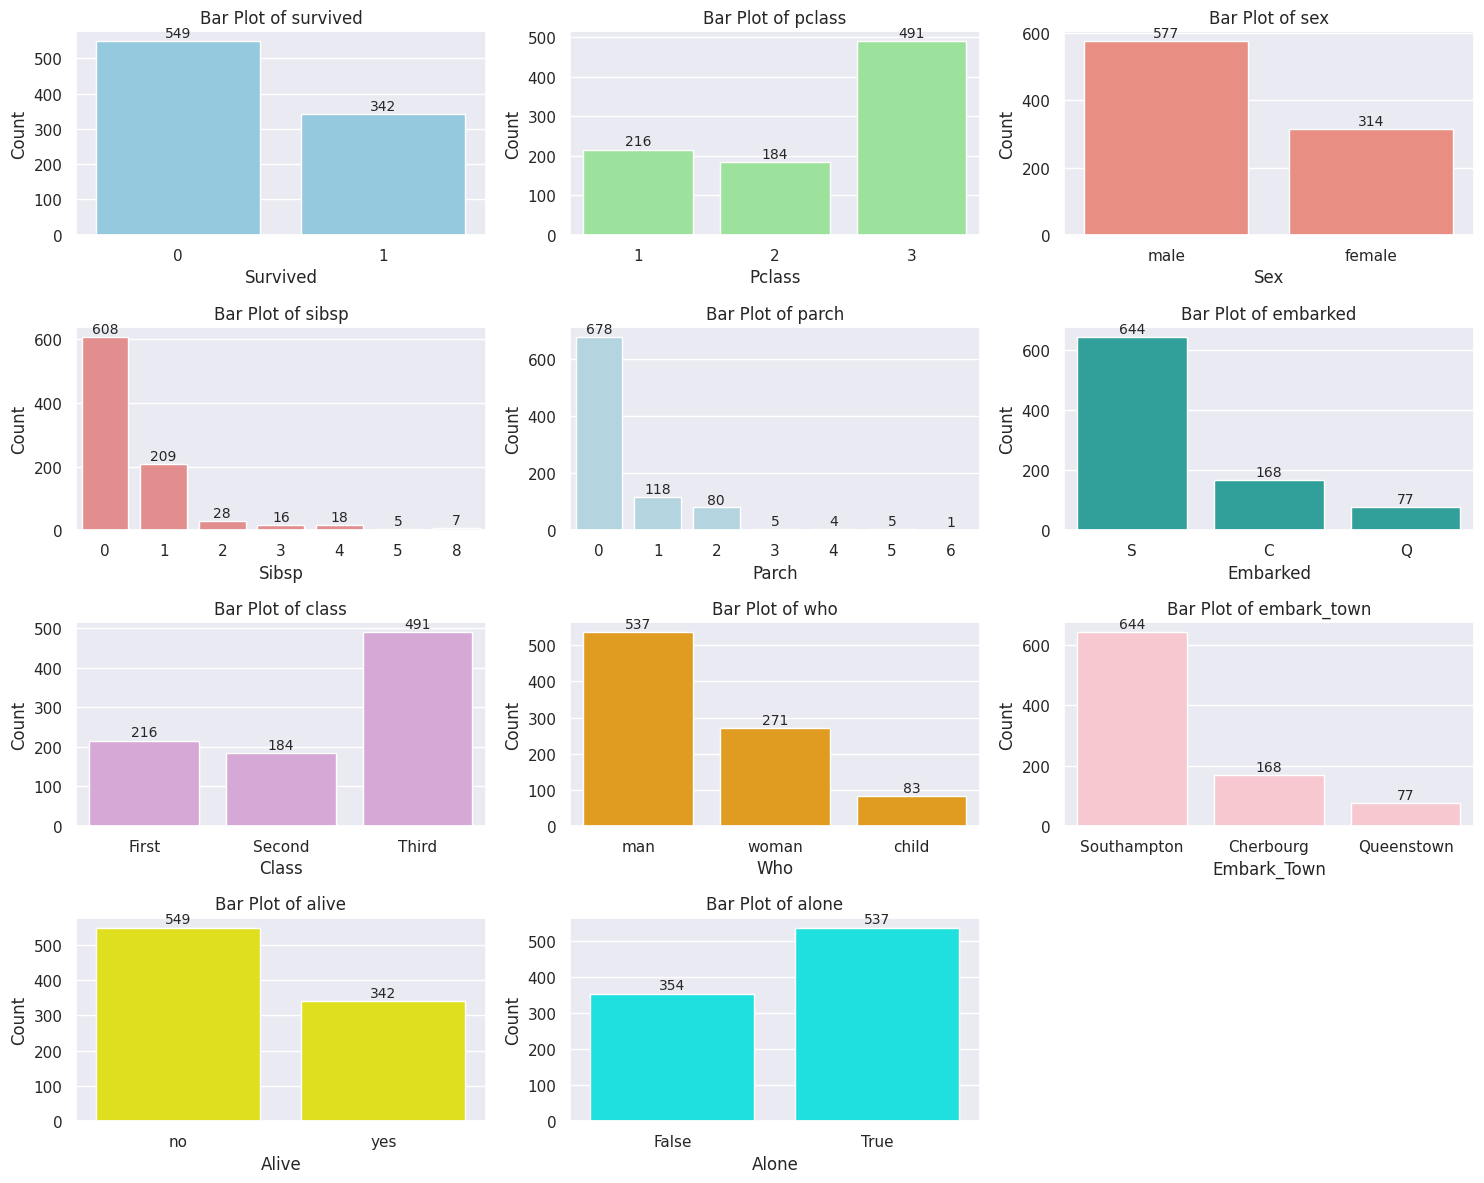

In [33]:
# Define the columns to plot
columns_to_plot = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']

# Define a list of colors to use for the bar plots
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue',
          'lightseagreen', 'plum', 'orange', 'pink', 'yellow', 'cyan']  # Add more colors if needed

# Determine the number of rows and columns for the subplot grid
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Ensure enough rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    # Select the appropriate subplot axis
    ax = axes[i]

    # Create the bar plot using countplot with a different color for each
    sns.countplot(x=col, data=df, ax=ax, color=colors[i])

    # Get the counts for each category
    counts = df[col].value_counts()

    # Add the count labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,  # Adjust vertical offset for label position
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

    # Set the title and labels for the subplot
    ax.set_title(f"Bar Plot of {col}")
    ax.set_xlabel(col.title())  # Capitalize the x-axis label
    ax.set_ylabel("Count")

# Remove any unused subplots (if the number of columns is not a multiple of num_cols)
if len(columns_to_plot) < num_rows * num_cols:
    for i in range(len(columns_to_plot), num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plots
plt.show()

# 4. How to Interpret Bar plot :

Key Features to Look For :

* Bar Heights/Lengths: The primary visual element.  The height (or length, if the bars are horizontal) of each bar corresponds to the numerical value for that category.  Longer bars indicate larger quantities.
* Comparison of Bars: The main purpose of a bar plot is to allow easy comparison between categories.  You can quickly see which categories have the highest and lowest values.

Ordering of Bars:

* If the categories on the x-axis have a natural order (e.g., months of the year, education levels), the bars should be arranged in that order.
* If there is no natural order, the bars are often sorted by height (descending or ascending) to make comparisons easier.
* Labels and Title: Clear labels on the axes and a descriptive title are essential for understanding the plot.
* Colors: If bars have different colors, check the legend for what the colors represent.



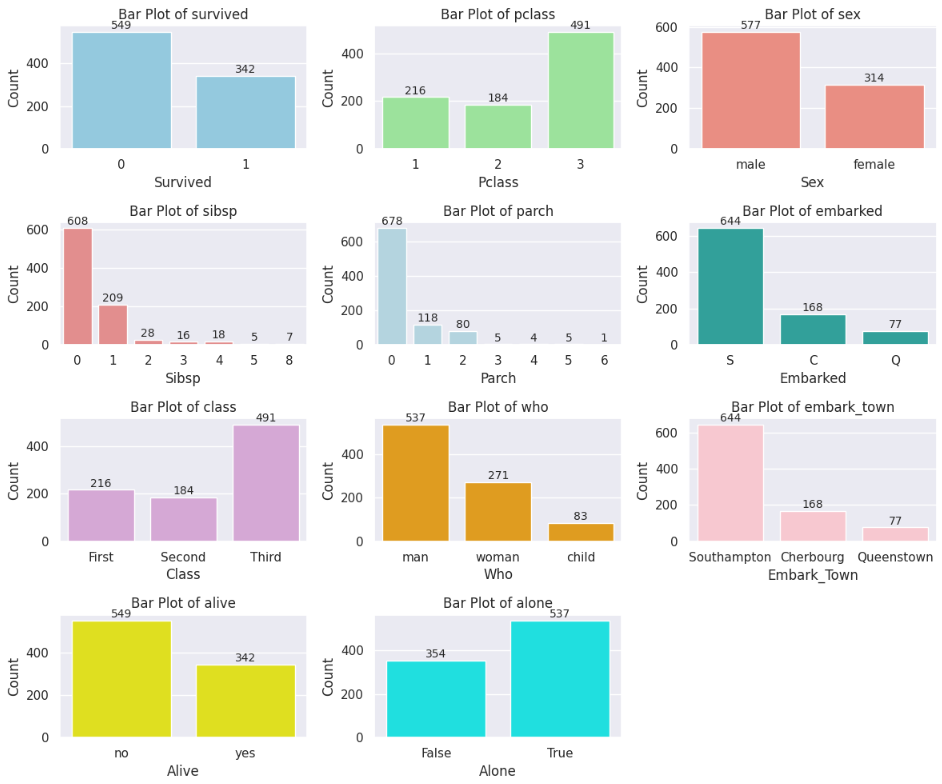


Bar Plot of Survived

* Bar Heights/Lengths: The bar for '0' (did not survive) is taller than the bar for '1' (survived).
* Comparison of Bars: More passengers did not survive than survived.
* Ordering of Bars: The bars are ordered by the values of the 'Survived' category (0 and 1).
* Labels and Title: The x-axis is labeled 'Survived', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Survived'.
* Colors: The bar colors are skyblue.

Bar Plot of Pclass

* Bar Heights/Lengths: The bar for '3' is the tallest, followed by '1', and then '2'.
* Comparison of Bars: Most passengers were in Pclass 3, and the fewest were in Pclass 2.
* Ordering of Bars: The bars are ordered by Pclass (1, 2, and 3).
* Labels and Title: The x-axis is labeled 'Pclass', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Pclass'.
* Colors: The bar colors are lightgreen.

Bar Plot of Sex

* Bar Heights/Lengths: The bar for 'male' is taller than the bar for 'female'.
* Comparison of Bars: There were more male passengers than female passengers.
* Ordering of Bars: The bars are ordered alphabetically ('female', 'male').
* Labels and Title: The x-axis is labeled 'Sex', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Sex'.
* Colors: The bar colors are lightcoral.

Bar Plot of Sibsp

* Bar Heights/Lengths: The tallest bar is for '0', then there's a significant drop, and the bars for 1 and 2 are noticeable.
* Comparison of Bars: Most passengers had no siblings or spouses. The number of passengers decreases as the number of siblings/spouses increases.
* Ordering of Bars: The bars are ordered by the number of siblings/spouses (0 to 8).
* Labels and Title: The x-axis is labeled 'Sibsp', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Sibsp'.
* Colors: The bar colors are salmon.

Bar Plot of Parch

* Bar Heights/Lengths: The tallest bar is for '0', followed by '1' and then '2'.
* Comparison of Bars: Most passengers had no parents or children. The number of passengers decreases as the number of parents/children increases.
* Ordering of Bars: The bars are ordered by the number of parents/children (0 to 6).
* Labels and Title: The x-axis is labeled 'Parch', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Parch'.
* Colors: The bar colors are skyblue.

Bar Plot of Embarked

* Bar Heights/Lengths: The bar for 'S' is the tallest, followed by 'C', and then 'Q'.
* Comparison of Bars: Most passengers embarked from Southampton (S), followed by Cherbourg (C), and then Queenstown (Q).
* Ordering of Bars: The bars are ordered alphabetically by the values of 'Embarked' (C, Q, S).
* Labels and Title: The x-axis is labeled 'Embarked', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Embarked'.
* Colors: The bar colors are teal.

Bar Plot of Class

* Bar Heights/Lengths: The bar for 'Third' is the tallest, followed by 'First', and then 'Second'.
* Comparison of Bars: Most passengers were in Third Class, followed by First Class, and then Second Class.
* Ordering of Bars: The bars are ordered as First, Second, and Third Class.
* Labels and Title: The x-axis is labeled 'Class', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Class'.
* Colors: The bar colors are plum.

Bar Plot of Who

* Bar Heights/Lengths: The bar for 'man' is the tallest, followed by 'woman', and then 'child'.
* Comparison of Bars: There were more men than women, and more women than children.
* Ordering of Bars: The bars are ordered as 'child', 'man', and 'woman'.
* Labels and Title: The x-axis is labeled 'Who', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Who'.
* Colors: The bar colors are orange.

Bar Plot of Embark Town

* Bar Heights/Lengths: The bar for 'Southampton' is the tallest, followed by 'Cherbourg', and then 'Queenstown'.
* Comparison of Bars: Most passengers embarked from Southampton, followed by Cherbourg, and then Queenstown.
* Ordering of Bars: The bars are ordered alphabetically by the values of 'Embark_Town'
* Labels and Title: The x-axis is labeled 'Embark_Town', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Embark_Town'.
* Colors: The bar colors are pink.

Bar Plot of Alive

* Bar Heights/Lengths: The bar for 'no' is taller than the bar for 'yes'.
* Comparison of Bars: More passengers did not survive than survived.
* Ordering of Bars: The bars are ordered as 'no' and 'yes'.
* Labels and Title: The x-axis is labeled 'Alive', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Alive'.
* Colors: The bar colors are yellow.

Bar Plot of Alone

* Bar Heights/Lengths: The bar for 'True' is taller than the bar for 'False'.
* Comparison of Bars: More passengers were traveling alone than with company.
* Ordering of Bars: The bars are ordered as 'False' and 'True'.
* Labels and Title: The x-axis is labeled 'Alone', and the y-axis is labeled 'Count'. The title is 'Bar Plot of Alone'.
* Colors: The bar colors are cyan.